# Unsupervised Learning: Clustering

So far, we have focused on **supervised learning**--cases where we have labeled data or known parameters (X's) and responses (y's) and the goal is to train a model to predict the response of a new observation given its parameters.

In **unsupervised learning** the goal is to give the computer some data (parameters-X's) and ask it to tell us something about the data. **Clustering** is a common task--here are some observations, partition them into groups or clusters. 

Clustering can be done to get **meaningful** clusters, where we learn something from the clustered data--clustering samples by their gene expression profiles can tell us something biological about their response to some treatment. Or the clusters can be **useful**, where clustering is part of a process to perform further analysis/action. We may cluster customers based on purchase history to then target adds to them.

There are many clustering methods, varying in performance and assumptions resulting in different results on different data types and distributions. This image from the [sklearn clustering page](https://scikit-learn.org/stable/modules/clustering.html) offers a handy visual of some of the differences in success with different data.

![Graphical overview of clustring methods](images/sphx_glr_plot_cluster_comparison_0011.png)


## Partitional Clustering

**Partitional clustering** divides data into non-overlapping clusters. Each observation can be in only one cluster and all clusters must contain at least one observation.

These methods typically require the user to specify the number of clusters ahead of time. The number of clusters is indicated by the variable $k$. 

Partitional algorithms are usually stochastic, initiated by random partitioning and refinement. As such, the clustering algorithm should be repeated multiple times.

Partitional clustering strengths:
* Work well when clusters have spherical or centered shape and similar sizes and densities.
* They scale well

Partitional clustering weaknesses:
* Not suited for clusters with complex shapes or different sizes or densities.

### K-means

K-means clustering is a common method. The algorithm tries to partition samples into $k$ clusters of equal variance, minimizing the **inertia**. Inertia is a within-cluster sum-of-squares. 

From the sklearn documentation:
> Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
> * Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
> * Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.


### Affinity Propagation

From the sklearn docs:
> [AffinityPropagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation) creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.
>
> Affinity Propagation can be interesting as it chooses the number of clusters based on the data provided. For this purpose, the two important parameters are the preference, which controls how many exemplars are used, and the damping factor which damps the responsibility and availability messages to avoid numerical oscillations when updating these messages.

## Hierarchical Clustering

**Hierarchical clustering** determines cluster assignment via a hierarchical tree of relationship. The clustering can either be:

* **Agglomerative**: A bottom-up approach that merges the most similar points iteratively until all points are included in the hierarchy
* **Divisive**: A top-down approach that iteratively splits the least similar points from the hierarchy.

The output of these methods is a dendrogram. Again, a $k$ value can be specified, constructing the dendrogram until $k$ clusters have been defined.

Hierarchical clustering is typically **deterministic**.

Hierarchical clustering strengths:
* They can graphically show similarities among clusters
* The dendrogram is relatively easily interpretable (though see below)

Hierarchical clustering weaknesses:
* The methods are computationally expensive
* The methods are sensitive to noise and outliers
* Dendrograms can often be misinterpreted.

## Density-Based Clustering

**Density-based clustering** uses the density of datapoints in a region in establishing clusters, assigning clusters in regions of high density separated by regions of low density.

Unlike the other methods, density-based clustering does not require specifying the number of clusters ahead of time. 

Examples include Density-Based Spatial Clustering of Applications with Noise (DBSCAN) and Ordering Points to Identify the Clustering Structure (OPTICS).

For more information on Denisty-Based Clustering, have a look at [DBSCAN clustering tutorial: example with Scikit-learn](https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/). 


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score,homogeneity_score,completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import scipy.cluster.hierarchy as shc

## K-means examples

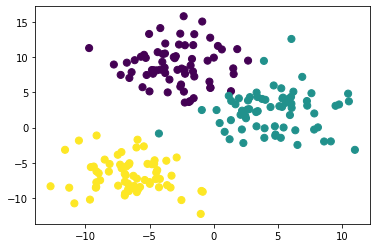

In [2]:
# Create some data
X, y = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
    )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

While our data are on the same scale, that isn't always the case, and scaling parameters is especially important for clustering algorithms.

We'll use the `StandardScaler` in our pipeline.



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model =Pipeline([ 
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(init='random', n_clusters=3,
                    n_init=10, max_iter=100,
                    random_state=42))
]).fit(X_train,y_train)

print(f"Inertia: {model['kmeans'].inertia_}")
print(f"Centroids: {model['kmeans'].cluster_centers_}")
print(f"Iterations to converge: {model['kmeans'].n_iter_}")

Inertia: 51.04930850313228
Centroids: [[-0.29042669  1.08380236]
 [-0.91970854 -1.1811411 ]
 [ 1.17282297  0.14046928]]
Iterations to converge: 6


In [4]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(y_test_pred,y_test)}")

Adjusted Mutual Information Score: 1.0


### A caution about confusion matrices
I'm leaving this in as an example of one issue of using a confusion matrix here.

Note that Kmeans has produced the correct clusters, but cluster number is irrelevant (and stochastic) and confusion matrix may indicate poor performance. I honestly don't know if there's a solution to this or not.

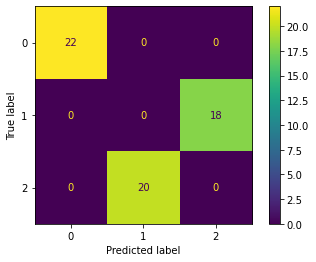

In [5]:
# Plot confusion matrix. 
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0,1,2]).plot()

### K-means with higher variance in data blobs
Let's make our cluster less distinct...

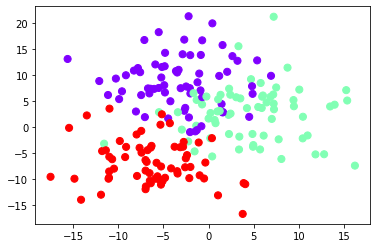

In [6]:
X, y = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=5,
    random_state=42
    )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model =Pipeline([ 
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(init='random', n_clusters=3,
                    n_init=10, max_iter=100,
                    random_state=42))
]).fit(X_train,y_train)

print(f"Inertia: {model['kmeans'].inertia_}")
print(f"Centroids: {model['kmeans'].cluster_centers_}")
print(f"Iterations to converge: {model['kmeans'].n_iter_}")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(y_test_pred,y_test)}")

Inertia: 101.5848807548915
Centroids: [[-0.64053333 -1.10803801]
 [-0.43162114  0.87253224]
 [ 1.12011238  0.13855775]]
Iterations to converge: 11
Adjusted Mutual Information Score: 0.630346316841058


### K-means++

sklearn implements a modified K-means, k-means++, where rather than random initialization of centroids, centroids are initialized to be as far apart as possible. This is typically more efficient and accurate. There is some improvement even on our data.

In [8]:
model =Pipeline([ 
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(init='k-means++', n_clusters=3,
                    n_init=10, max_iter=100,
                    random_state=42))
]).fit(X_train,y_train)

print(f"Inertia: {model['kmeans'].inertia_}")
print(f"Centroids: {model['kmeans'].cluster_centers_}")
print(f"Iterations to converge: {model['kmeans'].n_iter_}")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(y_test_pred,y_test)}")

Inertia: 101.5848807548915
Centroids: [[ 1.12011238  0.13855775]
 [-0.43162114  0.87253224]
 [-0.64053333 -1.10803801]]
Iterations to converge: 6
Adjusted Mutual Information Score: 0.630346316841058


## Affinity Propagation

Again, one of the nice features of Affinity Propagation is not having to specify $k$.

In [9]:
#Go back to the more distinct clusters

# Create some data
X, y = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
    )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model =Pipeline([ 
    ('scaler', StandardScaler()),
    ('af', AffinityPropagation(damping=0.5, preference=-50
                    ))
]).fit(X_train)

cluster_centers_indices = model['af'].cluster_centers_indices_
labels = model['af'].labels_

X_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Estimated number of clusters: {len(cluster_centers_indices)}")
print(f"Homogeneity: {homogeneity_score(y_test,y_test_pred)}")
print(f"Completeness: {completeness_score(y_test,y_test_pred)}")
print(f"V-measure: {v_measure_score(y_test,y_test_pred)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_test,y_test_pred)}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(y_test,y_test_pred)}")
print(f"Sihouette Coefficient: {silhouette_score(X_test, y_test_pred, metric='sqeuclidean')}")    


Estimated number of clusters: 3
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information Score: 1.0
Sihouette Coefficient: 0.8006163573200268


## Agglomerative Clustering

For this, we will use the [example from Pulkit Sharma's A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/).

> We will be working on a wholesale customer segmentation problem. You can download the dataset using [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv). The data is hosted on the UCI Machine Learning repository. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.
>
> Let’s explore the data first and then apply Hierarchical Clustering to segment the clients.

In [10]:
# Load the data
#data = pd.read_csv('/blue/zoo4926/share/Jupyter_Content/data/Wholesale_customers_data.csv')
data=pd.read_csv('data/Wholesale_customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


> There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.
>
> But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).
>
> So, let’s first normalize the data and bring all the variables to the same scale.

Note, we are switching to use the Normalize function rather than StandardScaler. There is a nice discussion and visualization of the data scaling options in [this article](http://benalexkeen.com/feature-scaling-with-scikit-learn/).

In [11]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


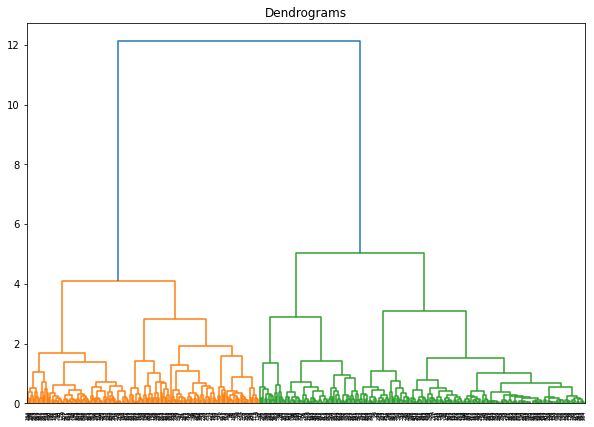

In [12]:
# Draw a dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))


In [13]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

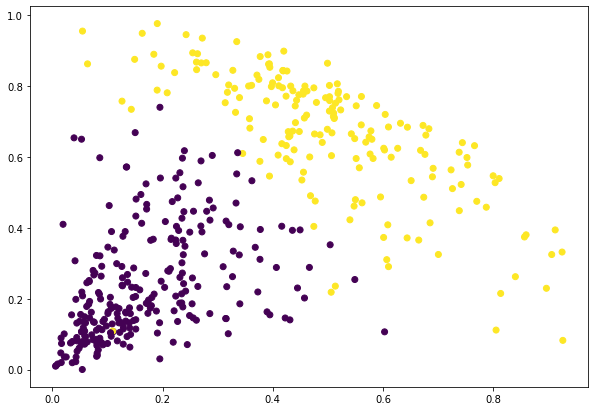

In [14]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

## Example of DBSCAN

For this example, I am using this tutorial from GeeksforGeeks on [Implementing DBSCAN algorithm using Sklearn](https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/).




In [15]:
X = pd.read_csv('data/CC_GENERAL.csv') 
#X = pd.read_csv('/blue/zoo4926/share/Jupyter_Content/data/CC_GENERAL.csv') 

# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [17]:
# Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506


In [18]:
# Building the clustering model
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 

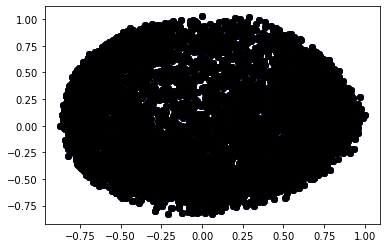

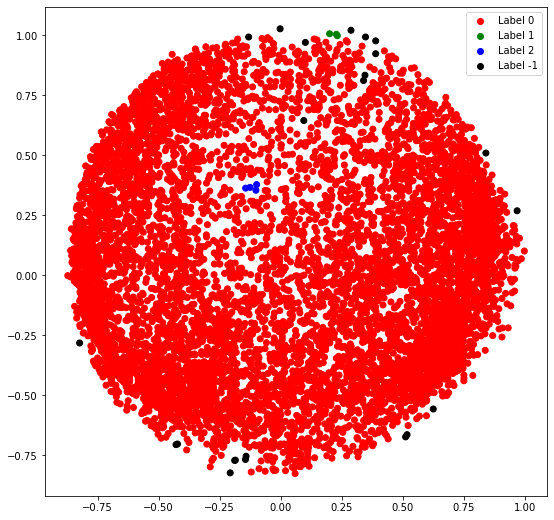

In [19]:
# Visualize the clustering

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For construction of the legend
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 


# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

### DBSCAN Parameter tuning

The main parameters for DBSCAN are:
* **Epsilon**, `eps=`: A distance around the points.
* **Minimum number of samples**, `min_samples`: The minimum number of samples, including the point itself, within the epsilon range for a point to be considered a **core point**

**Core points** are likely part of a cluster because they are near other points. For each core point, the other point are:
* **Directly reachable** if they are within Epsilon of the core point
* **Reachable** if there is a path to the core point via other points within Epsilon.
* An **outlier** (or part of another cluster)

The algorithm joins all the core points with the directly reachable and reachable points and discards any remaining outliers.

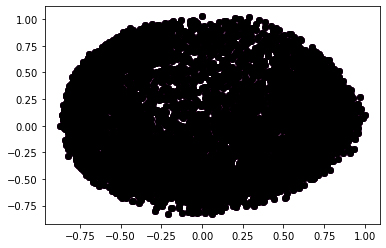

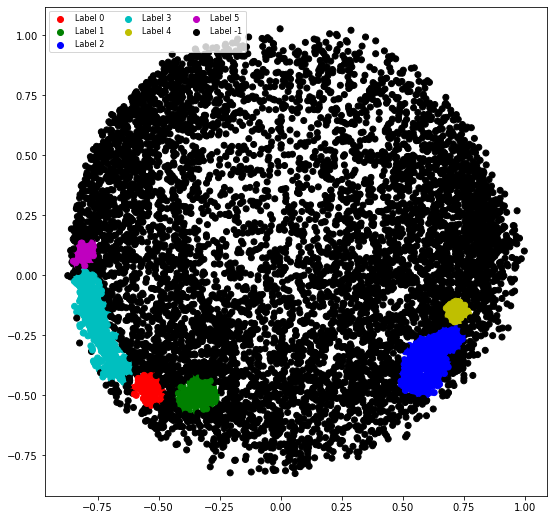

In [33]:
# Tune the model parameters 
# Original was min_samples = 3
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 

labels1 = db.labels_ 

# Visualize the clustering

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 